In [21]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

def convolve_np4(img, kernel):
    img_height = img.shape[0]
    img_width = img.shape[1]

    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    H = (kernel_height - 1) // 2
    W = (kernel_width - 1) // 2

    out = np.zeros((img_height, img_width))

    img = cv2.copyMakeBorder(img, H, H, W, W, cv2.BORDER_REPLICATE)

    for i in np.arange(H, img_height + 1):
        for j in np.arange(W, img_width + 1):
            out[i - H, j - W] = np.tensordot(img[i - H:i + H + 1, j - W:j + W + 1], kernel, axes=((0, 1), (0, 1)))

    return out

Downloading...
From: https://drive.google.com/uc?id=19peK_cbVAoTIRaKV0iBxZFrDMHC5xP1B
To: /content/1_306013.jpg
100% 88.8k/88.8k [00:00<00:00, 32.6MB/s]


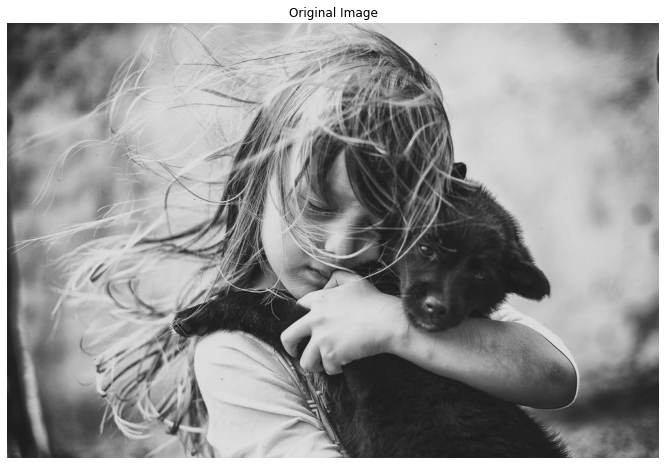

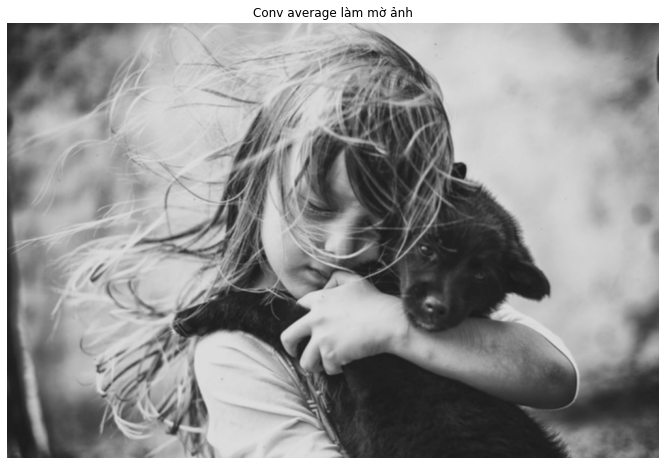

In [38]:
!gdown --id 19peK_cbVAoTIRaKV0iBxZFrDMHC5xP1B
filename = './1_306013.jpg'
image = cv2.imread(filename, 0)

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Original Image')
plt.axis('off')
plt.show()

kernel = np.array((
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]))

out_img = convolve_np4(image, kernel)

out_img = np.array(out_img, dtype='int16')

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(out_img, cmap='gray',norm=NoNorm())
plt.title('Conv average làm mờ ảnh')
plt.axis('off')
plt.show()


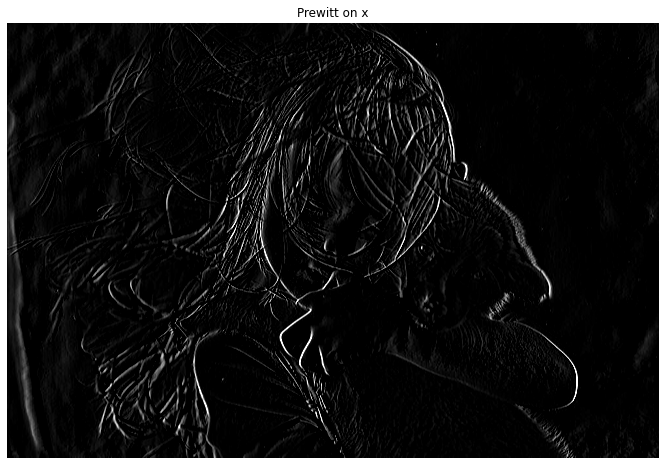

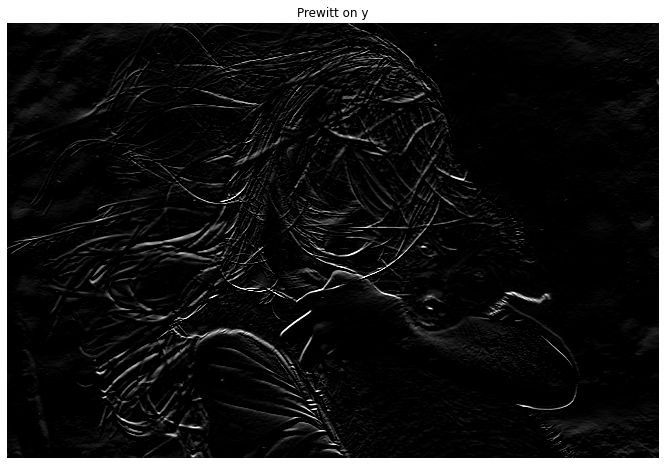

In [40]:
kernel = np.array((
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]))

out_img = convolve_np4(image, kernel)
out_img = np.array(out_img, dtype='int16')

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(out_img, cmap='gray',norm=NoNorm())
plt.title('Prewitt on x')
plt.axis('off')
plt.show()

kernel = np.array((
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]))

out_img = convolve_np4(image, kernel)
out_img = np.array(out_img, dtype='int16')

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(out_img, cmap='gray',norm=NoNorm())
plt.title('Prewitt on y')
plt.axis('off')
plt.show()

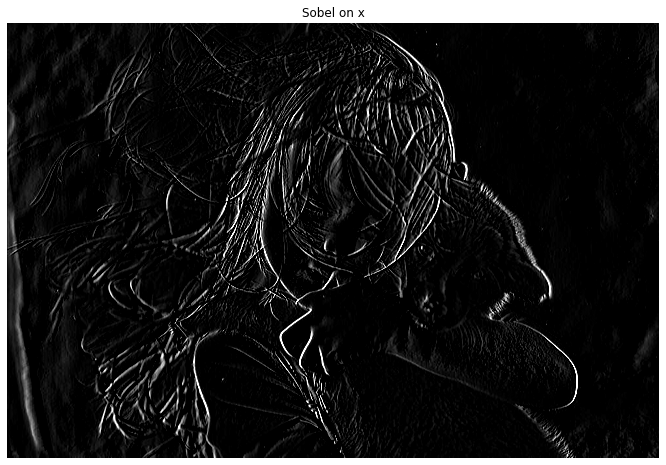

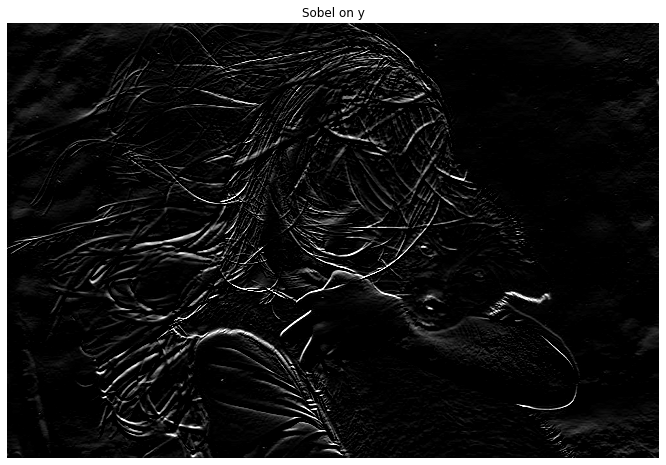

In [41]:
kernel = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]))

out_img = convolve_np4(image, kernel)
out_img = np.array(out_img, dtype='int16')

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(out_img, cmap='gray',norm=NoNorm())
plt.title('Sobel on x')
plt.axis('off')
plt.show()

kernel = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]))

out_img = convolve_np4(image, kernel)
out_img = np.array(out_img, dtype='int16')

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(out_img, cmap='gray',norm=NoNorm())
plt.title('Sobel on y')
plt.axis('off')
plt.show()